In [1]:
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../")
from dataloader.svdd_dataloader import CollisionLoader_new
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from load_data import load_data
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 
import librosa
%matplotlib inline

In [2]:
train_imu,train_audio,train_spec,val_imu,val_audio,val_spec,val_imu_normal,val_audio_normal,val_spec_normal = load_data()

train_combine = np.concatenate([np.mean(train_audio,axis=-1),train_imu],axis=1)

test_audio_all = np.concatenate([val_audio_normal,val_audio],axis=0)
test_imu_all   = np.concatenate([val_imu_normal,val_imu],axis=0)
test_combine = np.concatenate([np.mean(test_audio_all,axis=-1),test_imu_all],axis=1)

labels_all = np.concatenate([np.zeros(val_audio_normal.shape[0]),np.ones(val_audio.shape[0])])

In [3]:
clf_audio = IsolationForest(contamination=0.1, random_state=42).fit(np.mean(train_audio,axis=-1))
clf_imu = IsolationForest(contamination=0.1, random_state=42).fit(train_imu)
clf_all = IsolationForest(contamination=0.1, random_state=42).fit(train_combine)


In [9]:
scores_audio      = 1-clf_audio.decision_function(np.mean(test_audio_all,axis=-1))
scores_imu        = 1-clf_imu.decision_function(test_imu_all)
scores_all        = 1-clf_all.decision_function(test_combine)

eval_metrics_audio = ts_metrics(labels_all, scores_audio)
eval_metrics_imu = ts_metrics(labels_all, scores_imu)
result_audio = eval_metrics_audio
result_imu = eval_metrics_imu
eval_metrics_all = ts_metrics(labels_all, scores_all)
result_all = eval_metrics_all

print(result_audio)
print(result_imu)
print(result_all)

(0.9057557155684486, 0.8657995349718314, 0.8083620755716439, 0.8319444444444445, 0.7860892388451444)
(0.8305802338030115, 0.824640070553129, 0.7519093813062067, 0.9025735294117647, 0.6443569553805775)
(0.8995415457936178, 0.8630358013714232, 0.7889984477022128, 0.8282828282828283, 0.7532808398950132)


Text(0.5, 1.0, 'Reconstruction Loss Distribution')

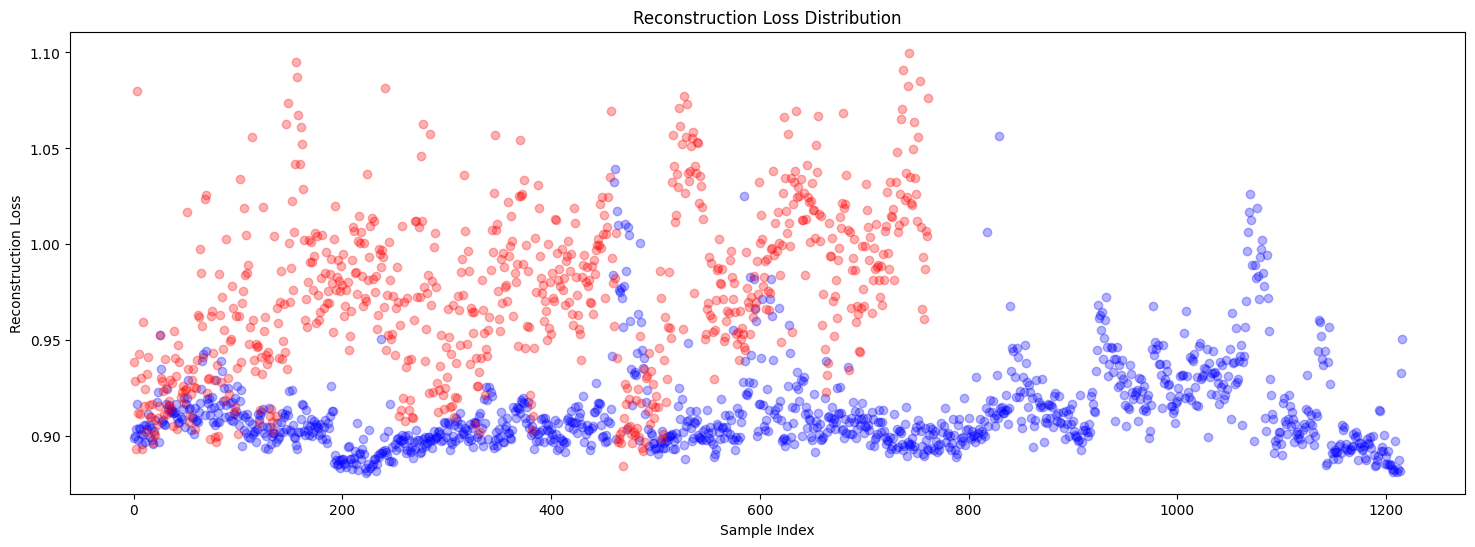

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.scatter(range(len(val_audio_normal)), scores_audio[:len(val_audio_normal)], color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(val_audio)), scores_audio[len(val_audio_normal):], color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
# plt.ylim(-0.2,0.2)

In [9]:
distance_audio_normal = if_audio.decision_function(np.mean(val_audio_normal, axis=-1))
distance_imu_normal = if_imu.decision_function(val_imu_normal)

distance_audio = if_audio.decision_function(np.mean(val_audio, axis=-1))
distance_imu = if_imu.decision_function(val_imu)

# Calculate the mean of the decision function scores for normal data
mean_distance_audio = np.mean(distance_audio_normal)
mean_distance_imu = np.mean(distance_imu_normal)

# Classify the data based on the mean decision scores
distance_audio = np.where(distance_audio >= mean_distance_audio, 1, 0)
distance_imu = np.where(distance_imu >= mean_distance_imu, 1, 0)

# Calculate False Negatives (FN) and True Negatives (TN)
FN = np.sum(distance_audio * distance_imu != 0)
TN = np.sum(distance_audio * distance_imu == 0)

# Classify the normal data based on the mean decision scores
distance_audio_normal = np.where(distance_audio_normal >= mean_distance_audio, 1, 0)
distance_imu_normal = np.where(distance_imu_normal >= mean_distance_imu, 1, 0)

# Calculate True Positives (TP) and False Positives (FP)
TP = np.sum(distance_audio_normal * distance_imu_normal != 0)
FP = np.sum(distance_audio_normal * distance_imu_normal == 0)

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
if (precision + recall) != 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

True Positives (TP): 662
False Positives (FP): 554
False Negatives (FN): 51
True Negatives (TN): 711
Accuracy: 0.6941354903943378
Precision: 0.5444078947368421
Recall: 0.9284712482468443
F1 Score: 0.6863659927423535
